In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations

In [5]:
# Leemos el csv, es un archivo grande
df = pd.read_csv("data/GEDEvent_v25_1.csv", low_memory=False)

Revisamos la estructura general:

In [6]:
df.head(3)

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,True,Clear,1,259,259,Iraq: Government,524,...,2017-07-31 00:00:00.000,0,4,0,2,6,6,6,645,NaN
1,412700,IRQ-2021-1-524-145,2021,True,Clear,1,259,259,Iraq: Government,524,...,2021-08-26 00:00:00.000,13,1,141,28,183,184,171,645,NaN
2,413023,IRQ-2021-1-524-143,2021,True,Clear,1,259,259,Iraq: Government,524,...,2021-08-28 00:00:00.000,0,2,0,0,2,3,0,645,NaN


In [7]:
# contamos filas y columnas
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

Número de filas: 385918
Número de columnas: 49


In [8]:
# Eliminamos duplicados y volvemos a contar filas
df.drop_duplicates(inplace=True)
print(f"Número de filas: {df.shape[0]}")

Número de filas: 385918


In [6]:
df_resumen = pd.DataFrame({
    'variable_name': df.columns,
    'dtype': df.dtypes.astype(str),
    'no nulos': df.count(),
    'unicos': df.nunique(),
    'unicos_%': (df.nunique()/df.count()*100).round(0).astype(int),
    'nulos': df.isna().sum(),
    'nulos_%': (df.isna().mean() * 100).round(0).astype(int),

})
df_resumen.reset_index(drop=True, inplace=True)

In [7]:
# Leemos el csv con la descripción de las variables y un primer filtro de columnas a dropear
variables = pd.read_csv("data/variable_names_and_descriptions.csv", encoding="utf-8", sep=";")

In [8]:
# Mergeamos los dos df
df_resumen = df_resumen.merge(variables, on="variable_name", how="left")
df_resumen = df_resumen.fillna('')

In [9]:
df_resumen

,variable_name,dtype,no nulos,unicos,unicos_%,nulos,nulos_%,description,eliminate,type,comment
0,id,int64,385918,385918,100,0,0,Identificador unico del evento,True,,No aporta info
1,relid,object,385918,385918,100,0,0,Identificador interno del evento (cambia si el...,True,,No aporta info
2,year,int64,385918,36,0,0,0,Ano del evento,False,Date,
3,active_year,bool,385918,2,0,0,0,True si el evento pertenece a un conflicto act...,False,Bool,
4,code_status,object,385918,1,0,0,0,Si el registro est ok (clear) o si hay que ch...,True,,Solo tiene clear
5,type_of_violence,int64,385918,3,0,0,0,"Tipo de violencia: 1. Conflicto entre estados,...",False,Nom,
6,conflict_dset_id,int64,385918,1484,0,0,0,Identificador deprecado,True,,Deprecado
7,conflict_new_id,int64,385918,1531,0,0,0,Identificador único del conflicto (usar esto p...,False,Nom,
8,conflict_name,object,385918,1529,0,0,0,Nombre del conflicto,False,Nom,
9,dyad_dset_id,int64,385918,1740,0,0,0,Identificador deprecado,True,,Deprecado


In [11]:
# Ajustamos las variables con fecha (mantenemos 'year' como int)
df_filtrado['date_start'] = pd.to_datetime(df_filtrado['date_start'], errors='coerce')
df_filtrado['date_end'] = pd.to_datetime(df_filtrado['date_end'], errors='coerce')

In [12]:
# Ajustamos la varable booleana 'active_year'
df_filtrado['active_year'] = df_filtrado['active_year'].astype(bool)

In [13]:
# Mapeamos la variable nominal 'type_of_violence' a 1: state-based conflict 2: non-state conflict 3: one-sided violence
df_filtrado["type_of_violence"] = df_filtrado["type_of_violence"].map({1: "state-based conflict", 2: "non-state conflict", 3: "one-sided violence"}).astype("category")

In [14]:
# Ajustamos las variables categóricas de alta cardinalidad
categoricas= ['conflict_new_id', 'conflict_name', 'dyad_new_id', 'dyad_name', 'side_a_new_id',
              'side_a', 'side_b_new_id', 'side_b', 'where_coordinates', 'where_description', 
              'adm_1', 'adm_2', 'geom_wkt', 'priogrid_gid', 'country', 'country_id', 'region']
for categorica in categoricas:
    df_filtrado[categorica] = df[categorica].astype("category")

In [15]:
df_filtrado.head(3)

,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,side_a,side_b_new_id,...,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low
0,2017,True,state-based conflict,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,...,1,2017-07-31,2017-07-31,0,4,0,2,6,6,6
1,2021,True,state-based conflict,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,...,1,2021-08-26,2021-08-26,13,1,141,28,183,184,171
2,2021,True,state-based conflict,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,...,1,2021-08-28,2021-08-28,0,2,0,0,2,3,0


In [16]:
# Chequeamos que la tipificación de las variables sea correcta
df_filtrado.dtypes

year                          int64
active_year                    bool
type_of_violence           category
conflict_new_id            category
conflict_name              category
dyad_new_id                category
dyad_name                  category
side_a_new_id              category
side_a                     category
side_b_new_id              category
side_b                     category
number_of_sources             int64
where_prec                    int64
where_coordinates          category
where_description          category
adm_1                      category
adm_2                      category
latitude                    float64
longitude                   float64
geom_wkt                   category
priogrid_gid               category
country                    category
country_id                 category
region                     category
event_clarity                 int64
date_prec                     int64
date_start           datetime64[ns]
date_end             datetim

In [17]:
df_filtrado.describe()

,year,number_of_sources,where_prec,latitude,longitude,event_clarity,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low
count,385918.000000,385918.000000,385918.000000,385918.000000,385918.000000,385918.000000,385918.000000,385918,385918,385918.000000,385918.000000,385918.000000,385918.000000,385918.000000,385918.000000,385918.000000
mean,2012.488513,0.821799,2.049314,26.094948,29.653143,1.076708,1.223301,2012-12-24 18:30:56.315590400,2012-12-26 21:42:11.375058944,2.470660,2.245581,3.819710,1.717893,10.253844,15.117004,8.537456
min,1989.000000,-1.000000,1.000000,-37.813611,-117.300000,1.000000,1.000000,1989-01-01 00:00:00,1989-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,-1.000000,1.000000,13.356770,29.171058,1.000000,1.000000,2007-07-13 00:00:00,2007-07-15 06:00:00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,2014.000000,1.000000,2.000000,33.000000,37.053240,1.000000,1.000000,2014-09-29 00:00:00,2014-09-30 00:00:00,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000
75%,2020.000000,1.000000,3.000000,35.784268,62.200001,1.000000,1.000000,2020-10-06 00:00:00,2020-10-07 00:00:00,0.000000,1.000000,1.000000,0.000000,4.000000,5.000000,4.000000
max,2024.000000,361.000000,7.000000,68.979170,155.896681,2.000000,5.000000,2024-12-31 00:00:00,2024-12-31 00:00:00,121848.000000,19874.000000,40000.000000,48183.000000,121848.000000,121848.000000,121848.000000
std,9.408420,1.648170,1.261082,16.048457,49.506979,0.266128,0.646853,NaN,NaN,254.720238,53.764628,178.402817,99.617277,347.680699,426.859964,313.655348


Pasamos al análisis univariado:

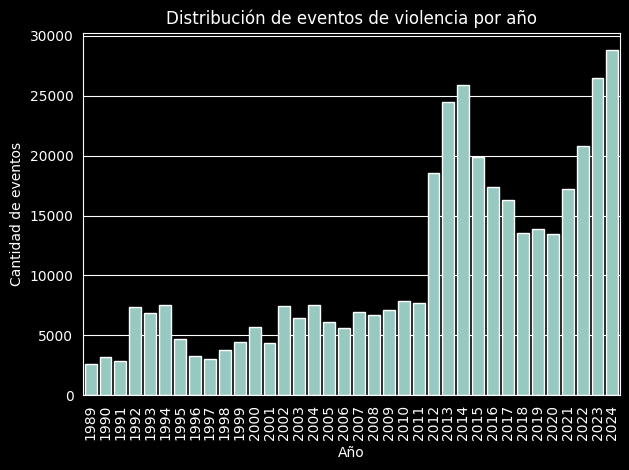

In [18]:
# Analizamos la cantidad de eventos de violencia por año
sns.countplot(x="year", data=df_filtrado)
plt.xticks(rotation=90)
plt.title("Distribución de eventos de violencia por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de eventos")
plt.tight_layout()
plt.show()

In [19]:
# Los eventos con 'active year' False se reparten en todos los años
tabla = pd.crosstab(df_filtrado["year"], df_filtrado["active_year"])
tabla["pct_false"] = tabla[False] / (tabla[True] + tabla[False]) * 100
print(tabla.round(0))

active_year  False   True  pct_false
year                                
1989           138   2486        5.0
1990           168   3034        5.0
1991           162   2708        6.0
1992           284   7049        4.0
1993           206   6622        3.0
1994           274   7295        4.0
1995           221   4476        5.0
1996           256   3038        8.0
1997           226   2781        8.0
1998           189   3598        5.0
1999           208   4204        5.0
2000           227   5498        4.0
2001           262   4101        6.0
2002           311   7156        4.0
2003           267   6156        4.0
2004           298   7235        4.0
2005           337   5788        6.0
2006           343   5261        6.0
2007           411   6516        6.0
2008           333   6382        5.0
2009           299   6847        4.0
2010           340   7545        4.0
2011           269   7446        3.0
2012           313  18227        2.0
2013           332  24189        1.0
2

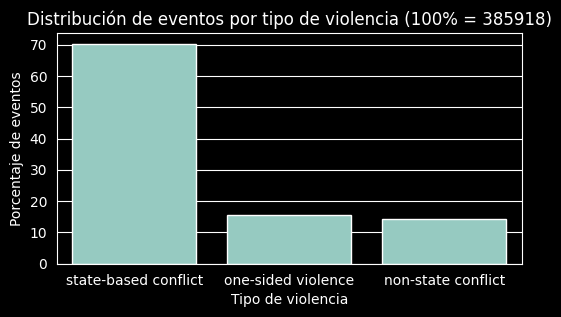

In [20]:
# Analizamos type_of_violence
df_filtrado['type_of_violence'].value_counts(normalize=True)
plt.figure(figsize=(6,3))
sns.countplot(x='type_of_violence', data=df_filtrado, stat='percent', order=['state-based conflict', 'one-sided violence','non-state conflict'])
plt.title("Distribución de eventos por tipo de violencia (100% = 385918)")
plt.xlabel("Tipo de violencia")
plt.ylabel("Porcentaje de eventos")
plt.show()

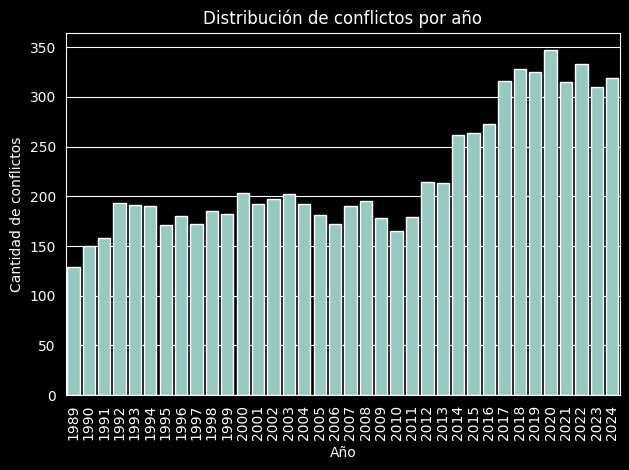

In [21]:
# Analizamos la cantidad de conflictos por año
conflictos_por_anio = df_filtrado.groupby('year')['conflict_new_id'].nunique().reset_index()

sns.barplot(x='year', y='conflict_new_id', data=conflictos_por_anio)
plt.xticks(rotation=90)
plt.title("Distribución de conflictos por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de conflictos")
plt.tight_layout()
plt.show()

In [22]:
# Vemos ahora las díadas participantes con mayor cantidad de eventos de violencia (top 20) 
eventos_por_diada = (
    df_filtrado.groupby('dyad_name', observed=True)
    ['year'].count()
    .reset_index()
    .rename(columns={'year': 'events'})
    .sort_values('events', ascending=False)
).reset_index(drop=True)

eventos_por_diada.head(20)

,dyad_name,events
0,Government of Syria - Syrian insurgents,66186
1,Government of Afghanistan - Taleban,35745
2,Government of Russia (Soviet Union) - Governme...,28499
3,Government of Turkey - PKK,7620
4,Government of India - Kashmir insurgents,7237
5,Government of Syria - IS,6695
6,IS - Civilians,5943
7,Government of Iraq - IS,5780
8,Government of Israel - Hamas,5758
9,Government of Bosnia-Herzegovina - Serbian Rep...,5540


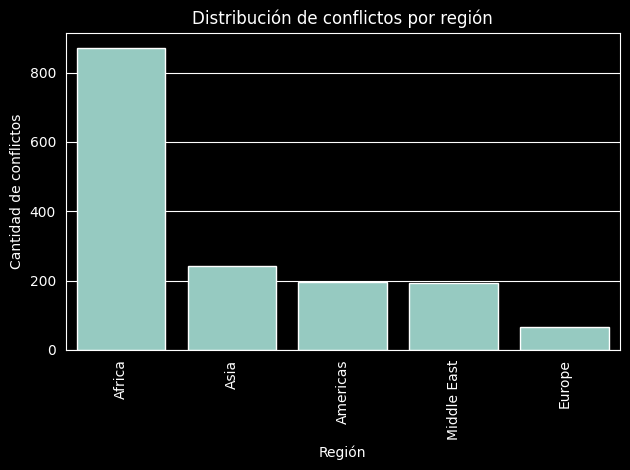

In [23]:
# Analizamos la cantidad de conflictos por región
conflictos_por_region = df_filtrado.groupby('region', observed=True)['conflict_new_id'].nunique().reset_index()

sns.barplot(x='region', y='conflict_new_id', data=conflictos_por_region, order=['Africa','Asia', 'Americas', 'Middle East', 'Europe'])
plt.xticks(rotation=90)
plt.title("Distribución de conflictos por región")
plt.xlabel("Región")
plt.ylabel("Cantidad de conflictos")
plt.tight_layout()
plt.show()

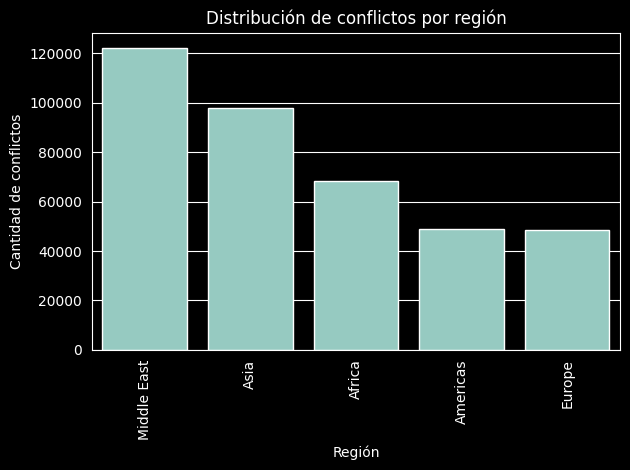

In [24]:
# Analizamos la cantidad de eventos por región
conflictos_por_region = df_filtrado.groupby('region', observed=True)['year'].count().rename('events').reset_index()

sns.barplot(x='region', y='events', data=conflictos_por_region, order=['Middle East', 'Asia', 'Africa', 'Americas',  'Europe'])
plt.xticks(rotation=90)
plt.title("Distribución de conflictos por región")
plt.xlabel("Región")
plt.ylabel("Cantidad de conflictos")
plt.tight_layout()
plt.show()

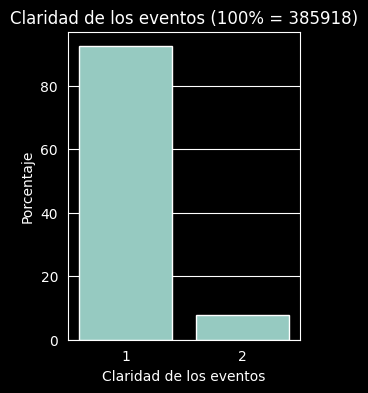

In [25]:
# Analizamos event_clarity
df_filtrado['event_clarity'].value_counts(normalize=True)
plt.figure(figsize=(3,4))
sns.countplot(x='event_clarity', data=df_filtrado, stat='percent')
plt.title("Claridad de los eventos (100% = 385918)")
plt.xlabel("Claridad de los eventos")
plt.ylabel("Porcentaje")
plt.show()

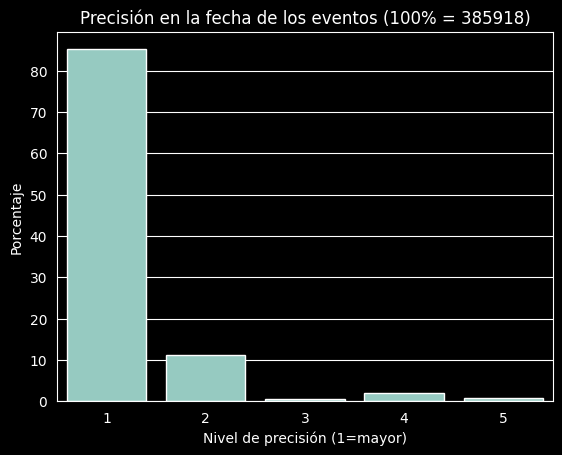

In [26]:
# Analizamos la precisión de la fecha de los eventos (date_prec)
df_filtrado['date_prec'].value_counts(normalize=True)
sns.countplot(x='date_prec', data=df_filtrado, stat='percent')
plt.title("Precisión en la fecha de los eventos (100% = 385918)")
plt.xlabel("Nivel de precisión (1=mayor)")
plt.ylabel("Porcentaje")
plt.show()

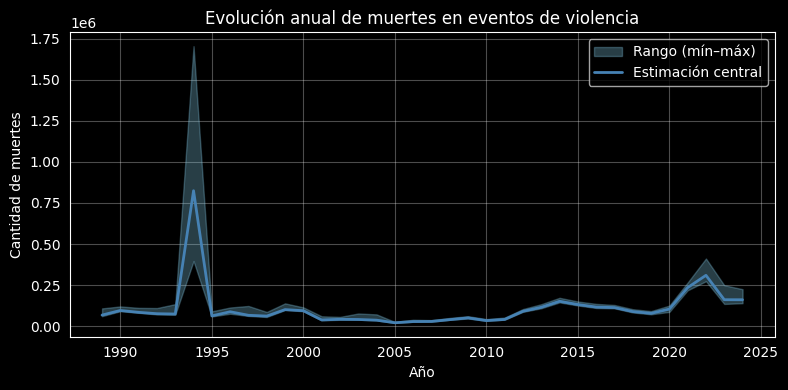

In [27]:
anual = (
    df_filtrado
    .groupby('year', observed=True)[['low', 'best', 'high']]
    .sum(min_count=1)
    .sort_index()
)

plt.figure(figsize=(8,4))

plt.fill_between(anual.index, anual['low'], anual['high'], 
                 color='skyblue', alpha=0.3, label='Rango (mín–máx)')
plt.plot(anual.index, anual['best'], color='steelblue', linewidth=2, label='Estimación central')
plt.title("Evolución anual de muertes en eventos de violencia")
plt.xlabel("Año")
plt.ylabel("Cantidad de muertes")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
# Analizamos el pico de 1994 y vemos que se debe al genocidio de Ruanda
conflictos_1994 = df_filtrado[df_filtrado['year']==1994].groupby('conflict_name', observed=True)['best'].sum().sort_values(ascending=False)
conflictos_1994.head()

conflict_name
Government of Rwanda - Civilians    759800
FPR - Civilians                      11074
Afghanistan: Government               8937
Bosnia-Herzegovina: Serb              4873
Turkey: Kurdistan                     4159
Name: best, dtype: int64

In [29]:
# En 2021 la mayor para de las muertes vienen de la guerra en Etiopia, Afganistán y Yemen
conflictos_2021 = df_filtrado[df_filtrado['year']==2021].groupby('conflict_name', observed=True)['best'].sum().sort_values(ascending=False)
conflictos_2021.head()

conflict_name
Ethiopia: Government                              124269
Afghanistan: Government                            35329
Yemen (North Yemen): Government                    23371
Jalisco Cartel New Generation - Sinaloa Cartel      5248
IS - Civilians                                      3775
Name: best, dtype: int64

In [30]:
# En 2022 continúan las muertes en Etiopía y se suman las de la guerra entre Rusia y Ucrania
conflictos_2022 = df_filtrado[df_filtrado['year']==2022].groupby('conflict_name', observed=True)['best'].sum().sort_values(ascending=False)
conflictos_2022.head()

conflict_name
Ethiopia: Government                              162453
Russia - Ukraine                                   91502
Jalisco Cartel New Generation - Sinaloa Cartel      4360
IS - Civilians                                      3808
Somalia: Government                                 3034
Name: best, dtype: int64

In [31]:
# Analizamos los conflictos con mayor mortandad en el período
conflictos_por_mortandad = df_filtrado.groupby('conflict_name', observed=True)['best'].sum().sort_values(ascending=False)
conflictos_por_mortandad.head(20)

conflict_name
Government of Rwanda - Civilians                  794321
Ethiopia: Government                              349526
Syria: Government                                 287394
Afghanistan: Government                           286149
Russia - Ukraine                                  242373
Eritrea - Ethiopia                                 98217
Iraq: Government                                   69368
Yemen (North Yemen): Government                    61456
Sri Lanka (Ceylon): Eelam                          60816
Sudan: Government                                  59547
Israel: Palestine                                  56117
Syria: Islamic State                               50025
Somalia: Government                                49259
IS - Civilians                                     46419
Ethiopia: Eritrea                                  43470
Turkey: Kurdistan                                  35043
Bosnia-Herzegovina: Serb                           34716
Pakistan: Governm

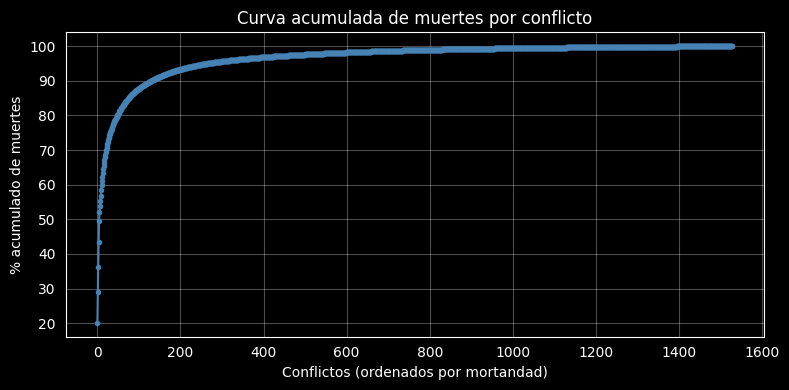

In [32]:
# Hacemos la curva acumulada de muertes en conflictos. Los principales 5 conflictos representan el 50% de la mortalidad acumulada
muertes_acum = conflictos_por_mortandad.cumsum()
muertes_acum_pct = muertes_acum / conflictos_por_mortandad.sum() * 100

plt.figure(figsize=(8,4))
plt.plot(muertes_acum_pct.values, marker='.', color='steelblue')
plt.title("Curva acumulada de muertes por conflicto")
plt.xlabel("Conflictos (ordenados por mortandad)")
plt.ylabel("% acumulado de muertes")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [33]:
# Analizamos las muertes en México y vemos que la guerra de la droga en México es el 6to conflicto con más muertes en el mundo
conflictos_mexico = (
    df_filtrado[df_filtrado['country'] == 'Mexico']
    .groupby('conflict_name', observed=True)['best']
    .sum()
    .sort_values(ascending=False)
)
carteles_mexico = conflictos_mexico[conflictos_mexico.index.str.contains('cartel', case=False)].sum()
print(f"Los carteles de México acumulan {carteles_mexico} muertes y son el 6to en la lista de conflictos por cantidad de muertos")
carteles_pct = carteles_mexico/conflictos_por_mortandad.sum() * 100
print(f"Esto representa {carteles_pct.round(0)}% del las muertes totales en eventos violentos")

Los carteles de México acumulan 137653 muertes y son el 6to en la lista de conflictos por cantidad de muertos
Esto representa 3.0% del las muertes totales en eventos violentos


In [34]:
# Calculamos la relación entre los dias del evento y las muertes
df_filtrado['dias_evento'] = (df_filtrado['date_end'] - df_filtrado['date_start']).dt.days

In [35]:
fechas_mal = df_filtrado[df_filtrado['dias_evento'] < 0]
fechas_mal # Chequeamos que no haya eventos con duración < 0

,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,side_a,side_b_new_id,...,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,dias_evento


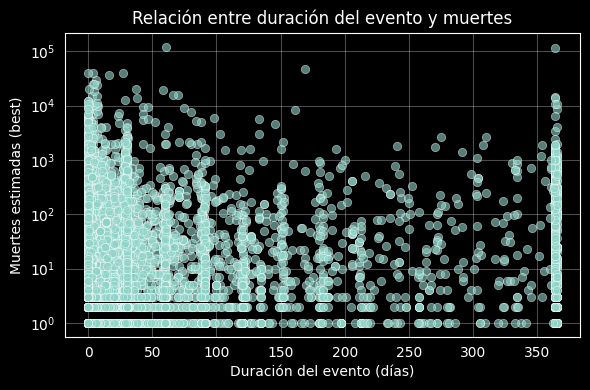

In [36]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df_filtrado,
    x='dias_evento',
    y='best',
    alpha=0.6
)
plt.yscale('log')
plt.title("Relación entre duración del evento y muertes")
plt.xlabel("Duración del evento (días)")
plt.ylabel("Muertes estimadas (best)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

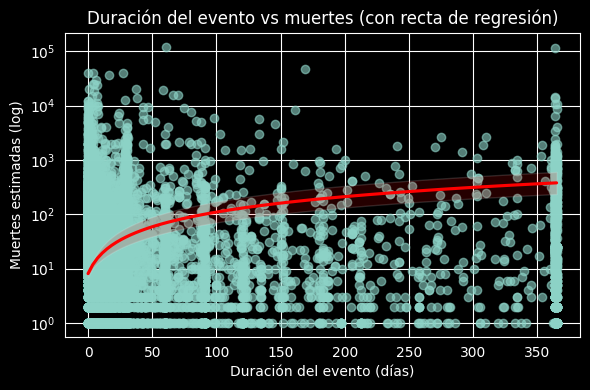

In [37]:
plt.figure(figsize=(6,4))
sns.regplot(
    data=df_filtrado,
    x='dias_evento',
    y='best',
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'},
)
plt.yscale('log')
plt.title("Duración del evento vs muertes (con recta de regresión)")
plt.xlabel("Duración del evento (días)")
plt.ylabel("Muertes estimadas (log)")
plt.tight_layout()
plt.show()

In [38]:
# Analizamos los eventos de un día con mayor mortandad en el período
mortandad_por_duracion_evento = df_filtrado.groupby('dias_evento', observed=True)['best'].sum().sort_values(ascending=False)
mortandad_por_duracion_evento.head(20)

dias_evento
0      1798919
1       306328
364     240894
2       152424
61      125073
4       121299
30       99811
7        91617
5        87758
3        80217
6        73734
29       65075
27       51669
169      48813
365      47946
16       41186
8        32719
43       24561
58       21151
37       20667
Name: best, dtype: int64

In [39]:
# Analizamos la duración y muertes de los principales conflictos
df_conflictos = (
    df_filtrado
    .groupby('conflict_name', observed=True)
    .agg(
        date_start_min=('date_start', 'min'),
        date_end_max=('date_end', 'max'),
        muertes=('best', 'sum')
    )
    .reset_index()
)

df_conflictos['duracion_dias'] = (df_conflictos['date_end_max'] - df_conflictos['date_start_min']).dt.days

df_conflictos.head()

,conflict_name,date_start_min,date_end_max,muertes,duracion_dias
0,"16th Division, Islamic Front, Jabhat Fateh al-...",2014-05-05,2014-05-05,35,0
1,1920 Revolution Brigades - IS,2007-02-09,2007-12-07,25,301
2,"23rd Division, Ahrar al-Sham, Jaysh al Nasr, J...",2018-01-14,2018-02-17,1129,34
3,"23rd Division, Jaysh al Nasr, Jaysh al-Nukhba,...",2018-01-20,2018-04-27,1333,97
4,3R - Civilians,2015-11-01,2020-09-10,235,1775


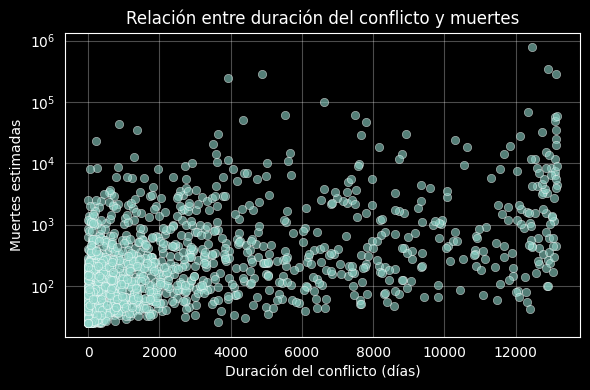

In [40]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df_conflictos,
    x='duracion_dias',
    y='muertes',
    alpha=0.6
)
plt.yscale('log')
plt.title("Relación entre duración del conflicto y muertes")
plt.xlabel("Duración del conflicto (días)")
plt.ylabel("Muertes estimadas")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

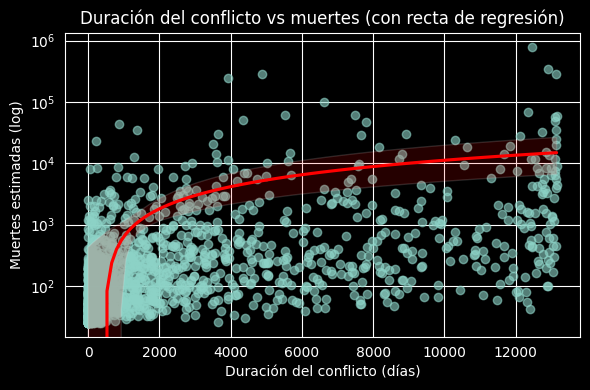

In [41]:
plt.figure(figsize=(6,4))
sns.regplot(
    data=df_conflictos,
    x='duracion_dias',
    y='muertes',
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'},
)
plt.yscale('log')
plt.title("Duración del conflicto vs muertes (con recta de regresión)")
plt.xlabel("Duración del conflicto (días)")
plt.ylabel("Muertes estimadas (log)")
plt.tight_layout()
plt.show()

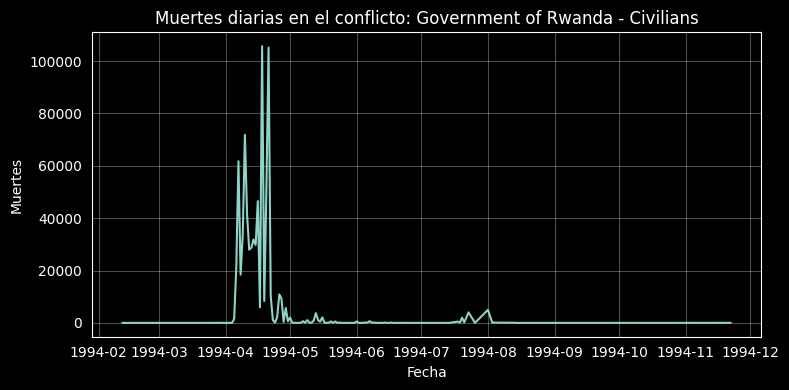

In [42]:
# Analizamos el conflicto de Ruanda
conflicto = 'Government of Rwanda - Civilians'
anio_inicio = 1994
anio_fin = 1994
df_conf = df_filtrado[(df_filtrado['conflict_name'] == conflicto) & (df_filtrado['year'] >= anio_inicio) & (df_filtrado['year'] <= anio_fin)].copy()
muertes_diarias = df_conf.groupby('date_start', observed=True)['best'].sum().sort_index()

plt.figure(figsize=(8,4))
plt.plot(muertes_diarias.index, muertes_diarias.values)
plt.title(f"Muertes diarias en el conflicto: {conflicto}")
plt.xlabel("Fecha")
plt.ylabel("Muertes")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

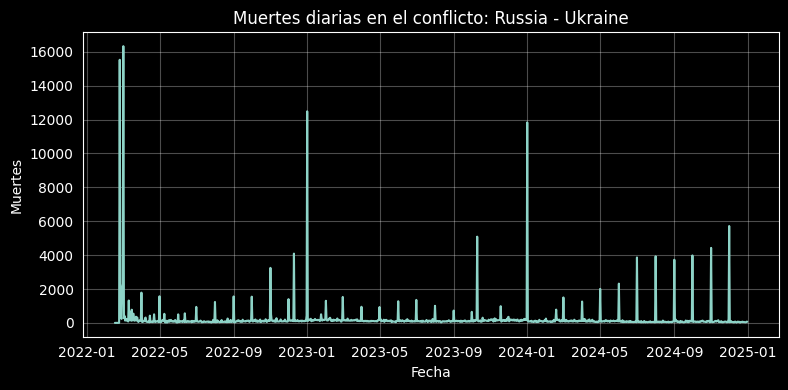

In [43]:
# Analizamos el conflicto de Rusia-Ucrania. Las muertes se notifican mensualmente
conflicto = 'Russia - Ukraine'
anio_inicio = 2022
anio_fin = 2024
df_conf = df_filtrado[(df_filtrado['conflict_name'] == conflicto) & (df_filtrado['year'] >= anio_inicio) & (df_filtrado['year'] <= anio_fin)].copy()
muertes_diarias = df_conf.groupby('date_start', observed=True)['best'].sum().sort_index()

plt.figure(figsize=(8,4))
plt.plot(muertes_diarias.index, muertes_diarias.values)
plt.title(f"Muertes diarias en el conflicto: {conflicto}")
plt.xlabel("Fecha")
plt.ylabel("Muertes")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()